### Как не переобучить дерево решений

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
features = data.feature_names
y = data.target

In [22]:
df_full = pd.DataFrame(X, columns=features)
df_full['target'] = y
df_full

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [23]:
df = df_full.iloc[:10]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((8, 8), (8,), (2, 8), (2,))

### Обучение

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.5, 0.9, 'Latitude <= 37.845\nsquared_error = 0.491\nsamples = 8\nvalue = 3.166'),
 Text(0.2, 0.7, 'AveBedrms <= 0.971\nsquared_error = 0.074\nsamples = 4\nvalue = 2.571'),
 Text(0.35, 0.8, 'True  '),
 Text(0.1, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 2.992'),
 Text(0.3, 0.5, 'Population <= 1378.5\nsquared_error = 0.02\nsamples = 3\nvalue = 2.431'),
 Text(0.2, 0.3, 'AveRooms <= 4.546\nsquared_error = 0.005\nsamples = 2\nvalue = 2.34'),
 Text(0.1, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 2.267'),
 Text(0.3, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 2.414'),
 Text(0.4, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 2.611'),
 Text(0.8, 0.7, 'Latitude <= 37.87\nsquared_error = 0.199\nsamples = 4\nvalue = 3.761'),
 Text(0.65, 0.8, '  False'),
 Text(0.7, 0.5, 'AveRooms <= 6.028\nsquared_error = 0.005\nsamples = 3\nvalue = 3.506'),
 Text(0.6, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 3.413'),
 Text(0.8, 0.3, 'MedInc <= 7.779\nsquared_error = 0.001\nsamples =

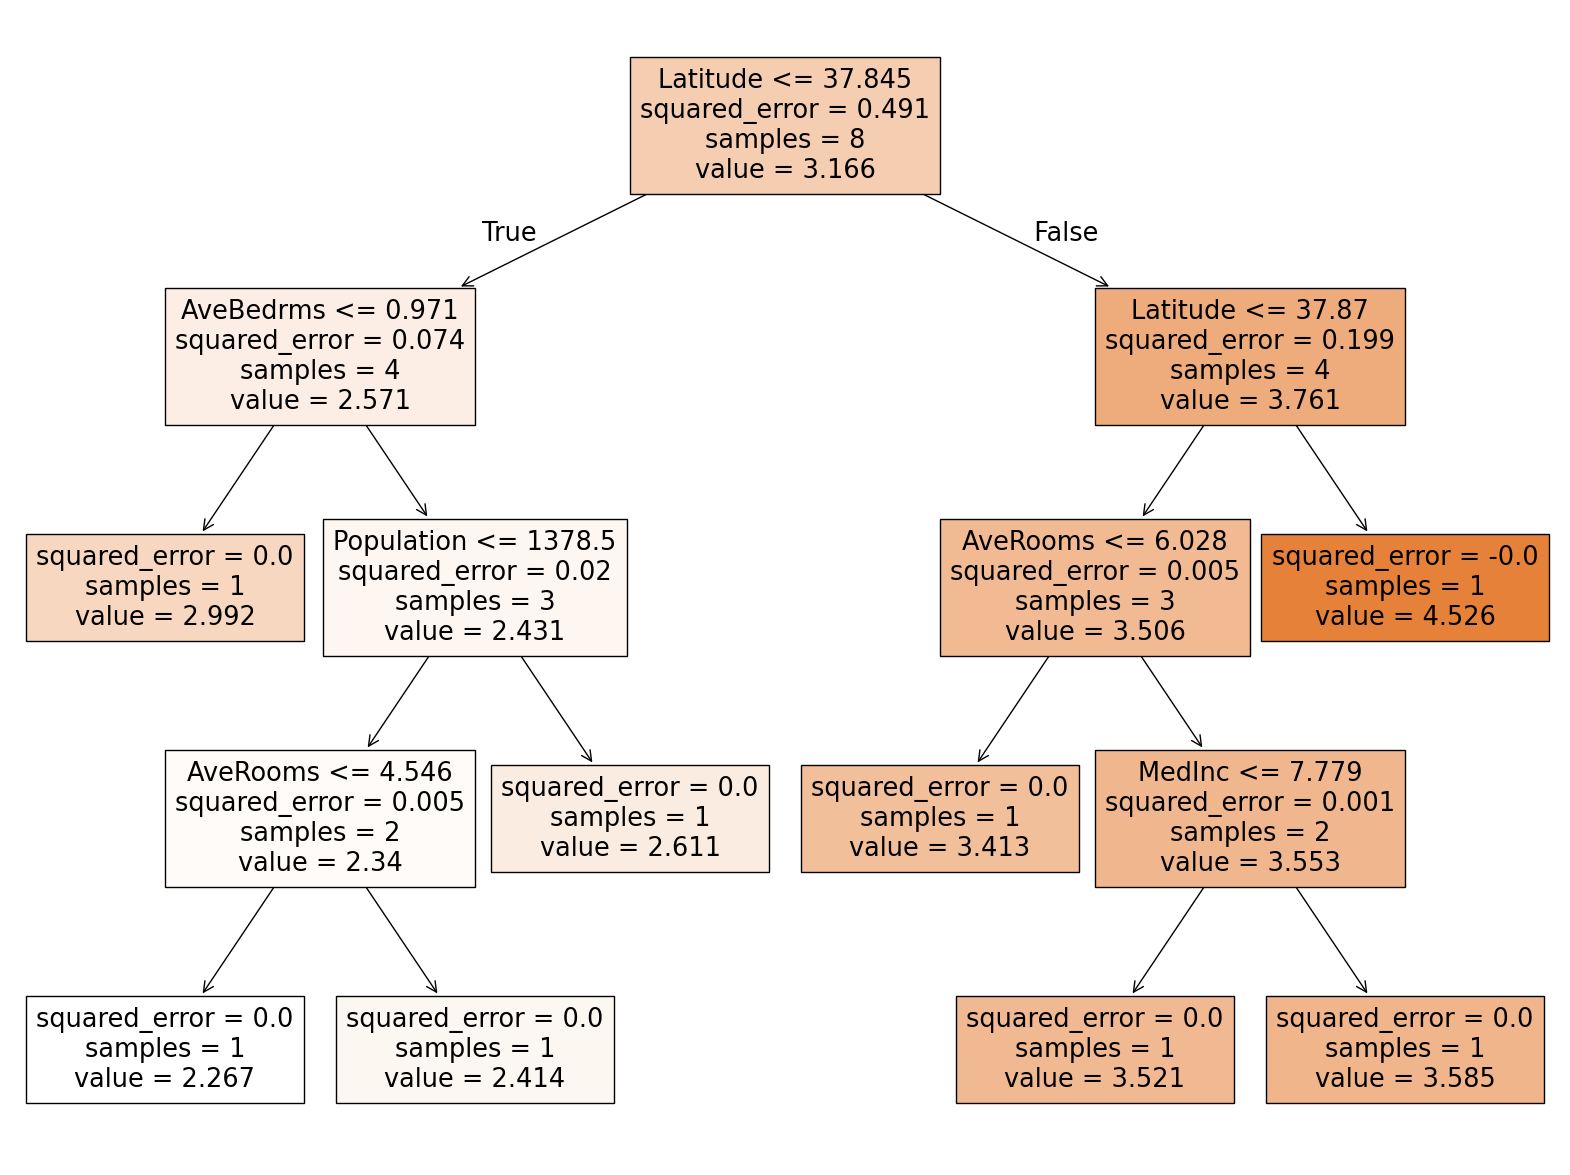

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(tree, feature_names=features, filled=True)

С помощью метрики MSE посмотрим, насколько хорошо обучилось дерево. Сначала сделаем предсказания на обучающей выборке, а потом на тестовой

In [27]:
from sklearn.metrics import mean_squared_error

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении: {mse_train:.2f}')
print(f'MSE на тесте: {mse_test:.2f}')

MSE на обучении: 0.00
MSE на тесте: 0.26


Метрика на обучении равна 0, значит модель идеально попала во все истинные значения, но ошибка на тесте высокая. Модель переобучилась.

Для борьбы с переобучением существуют критерии останова, например: max_depth, min_samples_leaf, max_leaf_nodes

In [28]:
#?DecisionTreeRegressor

### Max Depth
Максимальная глубина - количество уровней дерева

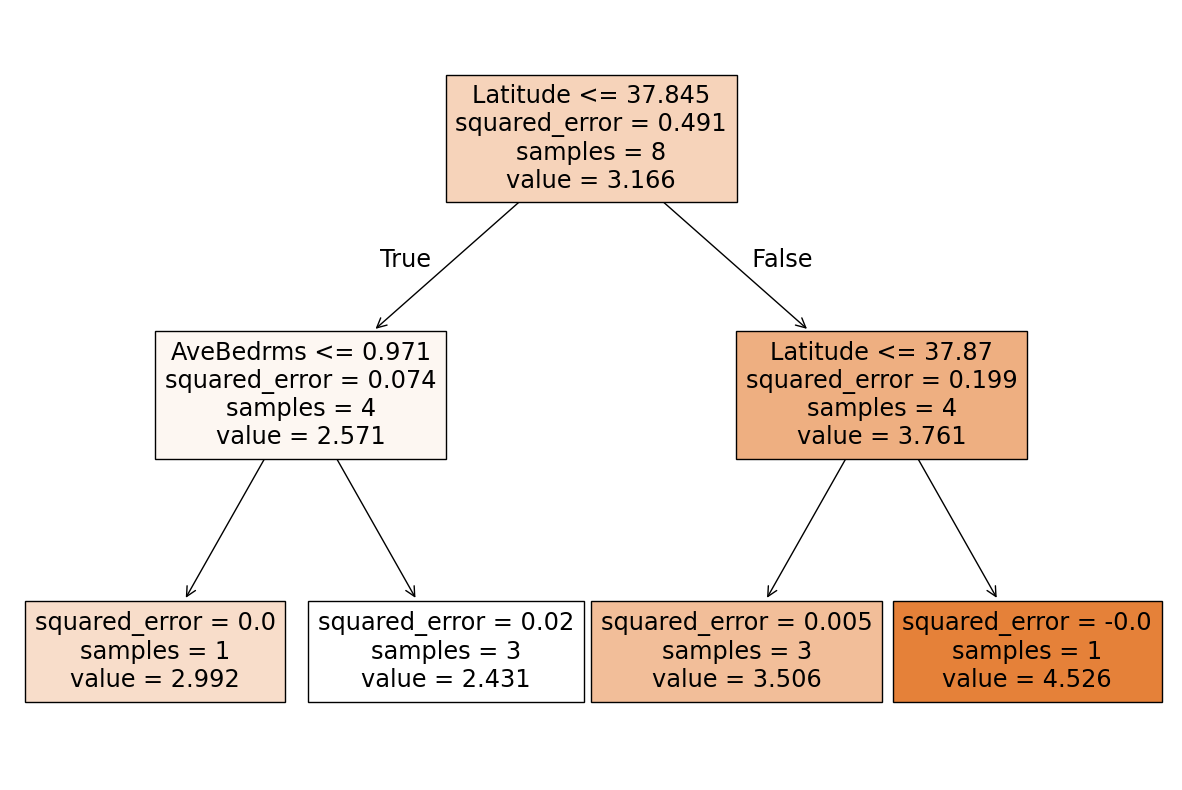

In [29]:
tree = DecisionTreeRegressor(random_state=1, max_depth=2)
tree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=features, filled=True);

### Min Samples Leaf
Минимальное количество объектов в одном листе

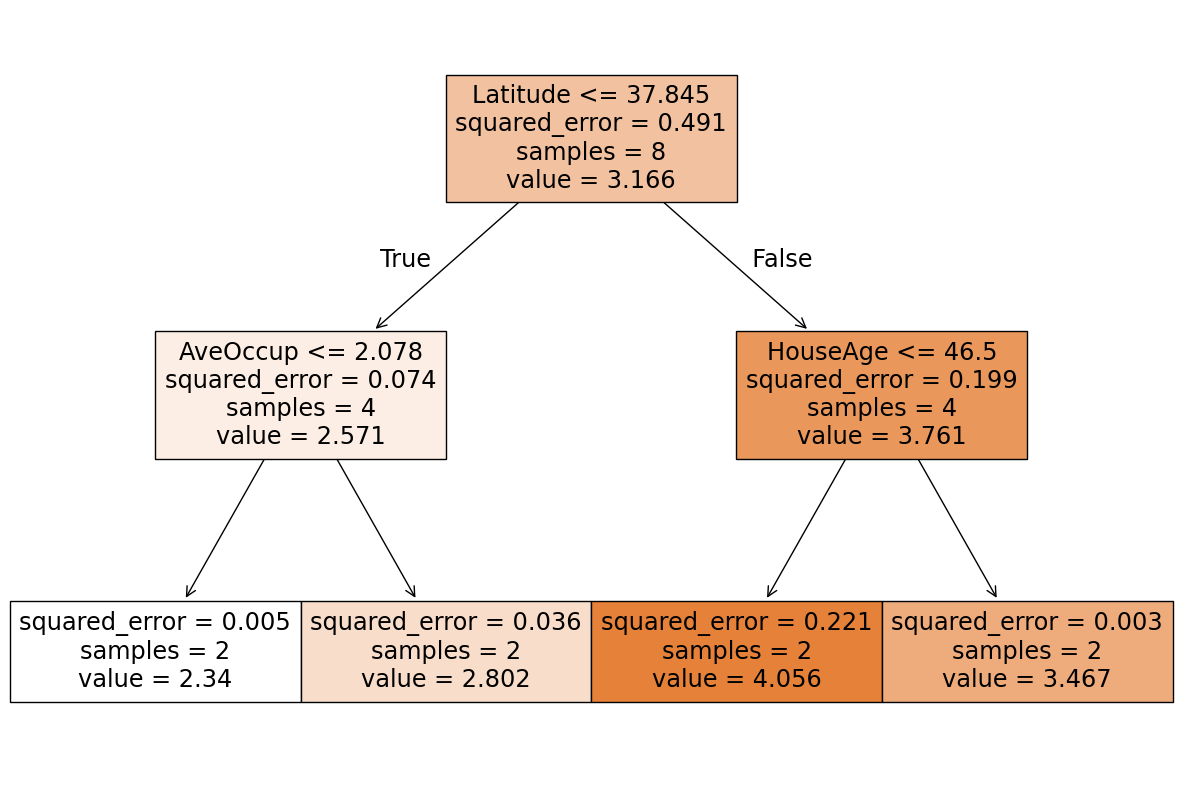

In [30]:
tree = DecisionTreeRegressor(random_state=1, min_samples_leaf=2)
tree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=features, filled=True);

### Max leaf nodes
Максимально количество листьев

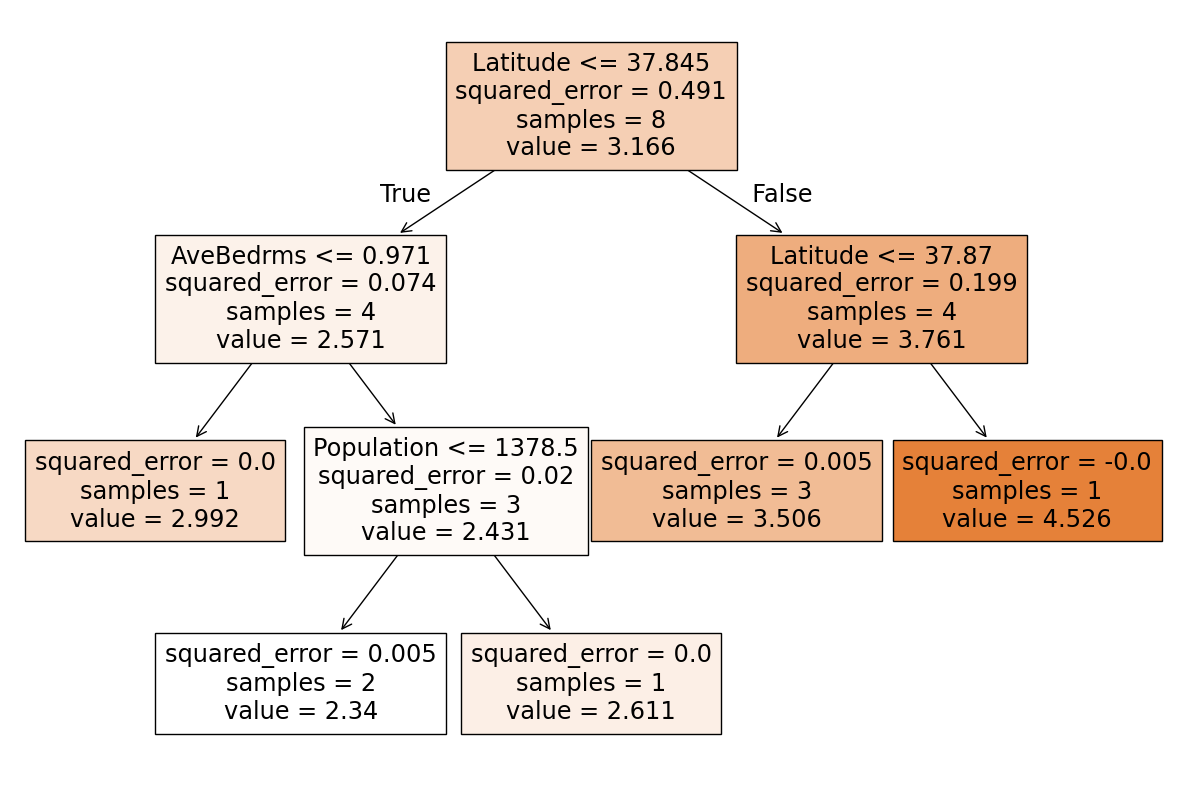

In [31]:
tree = DecisionTreeRegressor(random_state=1, max_leaf_nodes=5)
tree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=features, filled=True);

### Теперь используем все способы борьбы с переобучением вместе

Для начала обучем модель без ограничений

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    df_full[features],
    df_full['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [33]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [34]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении: {mse_train:2f}')
print(f'MSE на тесте: {mse_test:2f}')

MSE на обучении: 0.000000
MSE на тесте: 0.515994


Как можно заметить, модель переобучена. Оптимальный способ сейчас - поперебирать значения критериев останова в ручную

У меня получились такие значения

In [ ]:
tree = DecisionTreeRegressor(
    random_state=1,
    max_depth=14,
    min_samples_leaf=24,
    max_leaf_nodes=400
    )
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении: {mse_train:.2f}')
print(f'MSE на тесте: {mse_test:.2f}')

MSE на обучении 0.28
MSE на тесте 0.34


### Итог

Дерево решений - это модель, которая всегда переобучается, а задача программиста сделать так, чтобы это переобучение было минимальным.

В данном ноутбуке я показал 3 критерия останова, которые помогают найти баланс между недообучением и переобучением

Разумеется, в реальных проектах используются автоматические методы, например GridSearchCV. Я делал в ручную, чтобы разобраться и понять работу методов изнутри